# Classification Using K-Nearest Neighbor Algorithm

# Challenge

##  KNN using Income dataset

###Task 1

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split

In [ ]:
#reading data file

data_df=pd.read_csv('/content/sample_data/DS2_C6_S1_Income_Data_Challenge.csv')
data_df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [ ]:
#Structure of data
data_df.shape

(32561, 14)

In [ ]:
#summary of data
data_df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Task2

In [ ]:
# checking for null values
print(data_df.isnull().sum())

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64


In [ ]:
#getting to know column names
print(data_df.columns)

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')


In [ ]:
print(data_df.dtypes)

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object


In [ ]:
# Converting object data types into categorical column
data_df['WorkClass']=data_df['WorkClass'].astype('category')
data_df['Education']=data_df['Education'].astype('category')
data_df['Marital_Status']=data_df['Marital_Status'].astype('category')
data_df['Occupation']=data_df['Occupation'].astype('category')
data_df['Relationship']=data_df['Relationship'].astype('category')

data_df['Gender']=data_df['Gender'].astype('category')
data_df['Native_Country']=data_df['Native_Country'].astype('category')
data_df['Income_Bracket']=data_df['Income_Bracket'].astype('category')

In [ ]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()

data_df['WorkClass_encode']= label_encoder.fit_transform(data_df['WorkClass'])
data_df['WorkClass_encode'].unique()

data_df['Education_encode']= label_encoder.fit_transform(data_df['Education'])
data_df['Education_encode'].unique()

data_df['Marital_Status_encode']= label_encoder.fit_transform(data_df['Marital_Status'])
data_df['Marital_Status_encode'].unique()

data_df['Occupation_encode']= label_encoder.fit_transform(data_df['Occupation'])
data_df['Occupation_encode'].unique()

data_df['Relationship_encode']= label_encoder.fit_transform(data_df['Relationship'])
data_df['Relationship_encode'].unique()


data_df['Gender_encode']= label_encoder.fit_transform(data_df['Gender'])
data_df['Gender_encode'].unique()

data_df['Native_Country_encode']= label_encoder.fit_transform(data_df['Native_Country'])
data_df['Native_Country_encode'].unique()

data_df['Income_Bracket_encode']= label_encoder.fit_transform(data_df['Income_Bracket'])
data_df['Income_Bracket_encode'].unique()

array([0, 1])

In [ ]:
data_df.head()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.875,0.600000,0.666667,0.071429,0.2,1.0,0.951220,0.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.750,0.600000,0.333333,0.285714,0.0,1.0,0.951220,0.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.500,0.733333,0.000000,0.428571,0.2,1.0,0.951220,0.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.500,0.066667,0.333333,0.428571,0.0,1.0,0.951220,0.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.500,0.600000,0.333333,0.714286,1.0,0.0,0.121951,0.0


In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = data_df.select_dtypes(include=numerics)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df.to_numpy()),columns=new_data_df.columns)
 return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process
scale = 'minmax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df=data_df_scaled

In [ ]:
# finding correlation
cor=data_df.corr()
cor

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.003787,-0.010508,-0.266288,-0.020947,-0.263698,0.088832,-0.001151,0.234037
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.016656,-0.028145,0.028153,0.001597,0.008931,0.026858,-0.051966,-0.009463
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.052085,0.359153,-0.069304,0.109697,-0.094153,0.012280,0.050840,0.335154
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.033835,0.030046,-0.043393,0.025505,-0.057919,0.048480,-0.001982,0.223329
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.012216,0.016746,-0.034187,0.017987,-0.061062,0.045567,0.000419,0.150526
Hours_Per_Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138962,0.055510,-0.190519,0.080383,-0.248974,0.229309,-0.002671,0.229689
WorkClass_encode,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,1.000000,0.023513,-0.064731,0.254892,-0.090461,0.095981,-0.007690,0.051604
Education_encode,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,0.023513,1.000000,-0.038407,-0.021260,-0.010876,-0.027356,0.064288,0.079317
Marital_Status_encode,-0.266288,0.028153,-0.069304,-0.043393,-0.034187,-0.190519,-0.064731,-0.038407,1.000000,-0.009654,0.185451,-0.129314,-0.023819,-0.199307
Occupation_encode,-0.020947,0.001597,0.109697,0.025505,0.017987,0.080383,0.254892,-0.021260,-0.009654,1.000000,-0.075607,0.080296,-0.012543,0.075468


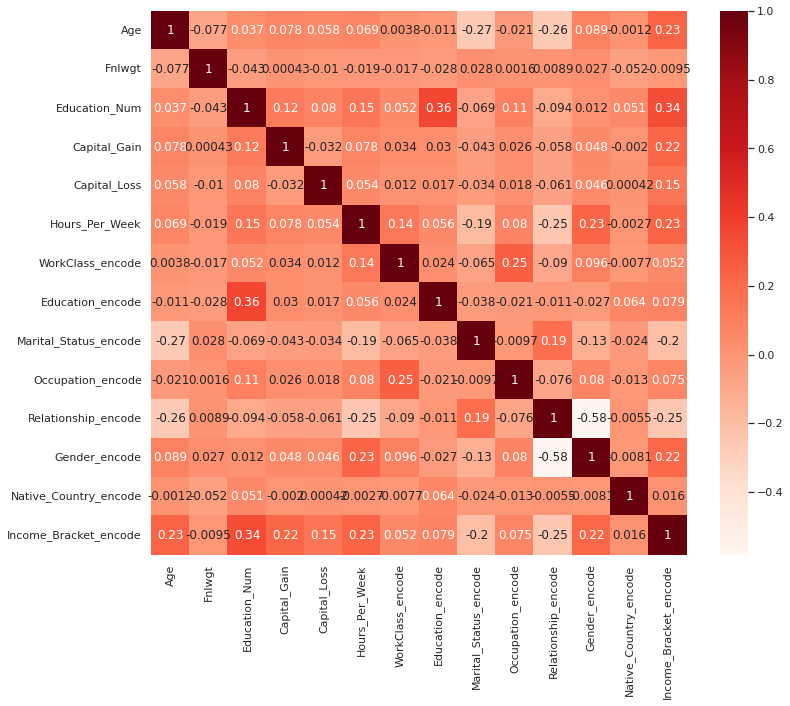

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Income_Bracket_encode"])
print(cor_target)

Age                      0.234037
Fnlwgt                   0.009463
Education_Num            0.335154
Capital_Gain             0.223329
Capital_Loss             0.150526
Hours_Per_Week           0.229689
WorkClass_encode         0.051604
Education_encode         0.079317
Marital_Status_encode    0.199307
Occupation_encode        0.075468
Relationship_encode      0.250918
Gender_encode            0.215980
Native_Country_encode    0.015840
Income_Bracket_encode    1.000000
Name: Income_Bracket_encode, dtype: float64


In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.2]
print(relevant_features)

Age                      0.234037
Education_Num            0.335154
Capital_Gain             0.223329
Hours_Per_Week           0.229689
Relationship_encode      0.250918
Gender_encode            0.215980
Income_Bracket_encode    1.000000
Name: Income_Bracket_encode, dtype: float64


# The features only with corr value>0.2 is used for model training and evaluation

In [ ]:
#Selecting highly correlated features with the target variable
relevant_features = cor_target[(cor_target!=1.0)]
high_corr_features = relevant_features[(relevant_features>=0.2)]
#print(relevant_features)
feat=high_corr_features.index.tolist()
feat
target_class=cor_target[cor_target==1.0].index.tolist()

In [ ]:
type(target_class)

list

In [ ]:
X=data_df[feat]
y=data_df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
print('Size of training dataset: ', y_train.shape)
print('Size of test dataset: ', y_test.shape)

Size of training dataset:  (26048,)
Size of test dataset:  (6513,)


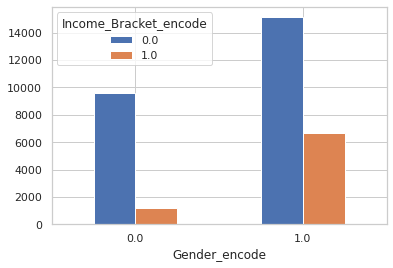

In [ ]:
# Visualizing Gender and Income_Bracket
ct=pd.crosstab(data_df['Gender_encode'],data_df['Income_Bracket_encode'])
barplot = ct.plot.bar(rot=0)

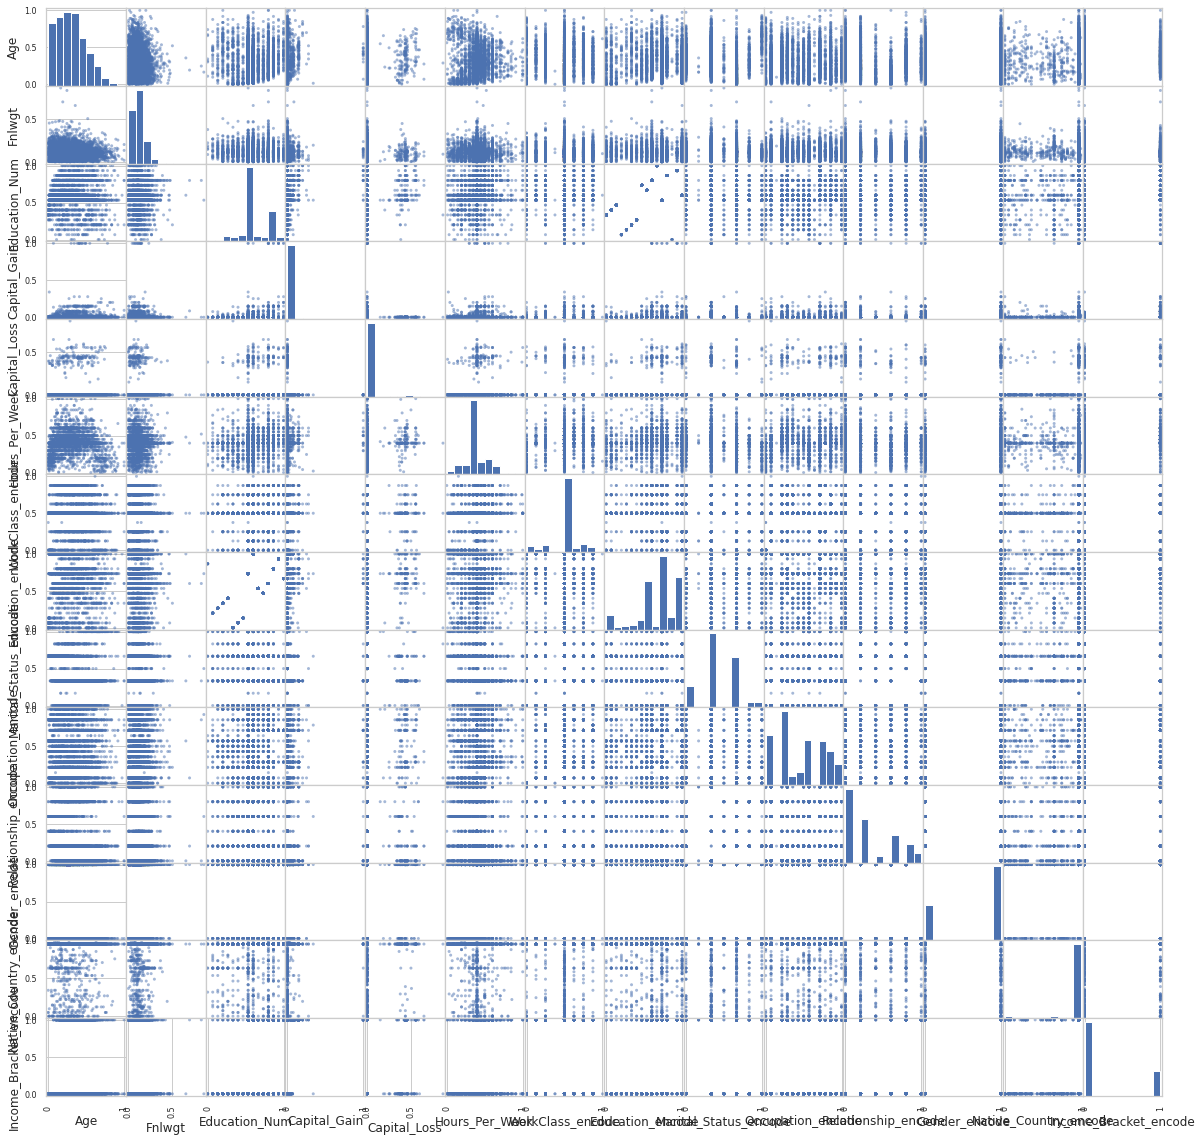

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_data_df = data_df.select_dtypes(include=numerics)
numeric_cols=new_data_df.columns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

pd.plotting.scatter_matrix(new_data_df[numeric_cols].sample(4000),figsize=(20,20),cmap='viridis')
plt.show()


16


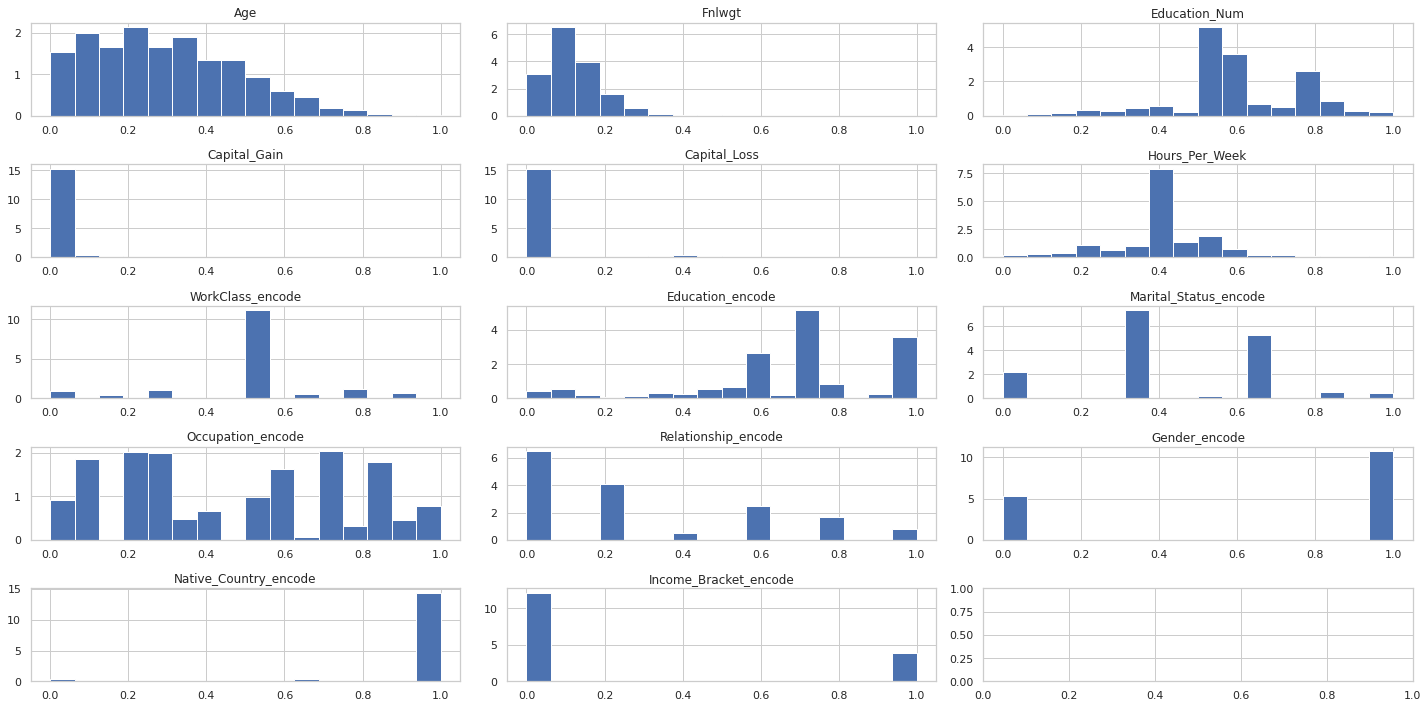

In [ ]:
# Histogram of all numerical features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df1 = data_df.select_dtypes(include=numerics)
numeric_cols=df1.columns
num_cols=3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n))
  
bin_count = int(np.ceil(np.log2(len(df1.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
 ax.hist(df1[col],bins=n_bins,density=True)
 ax.set_title(col)
plt.show()

Inference: The columns are not uniformly distributed

### Task3

#Finding optimal value of K using mean error

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test).ravel()
    error.append(np.mean(pred_i != (y_test)))

##The above code executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

Text(0, 0.5, 'Mean Error')

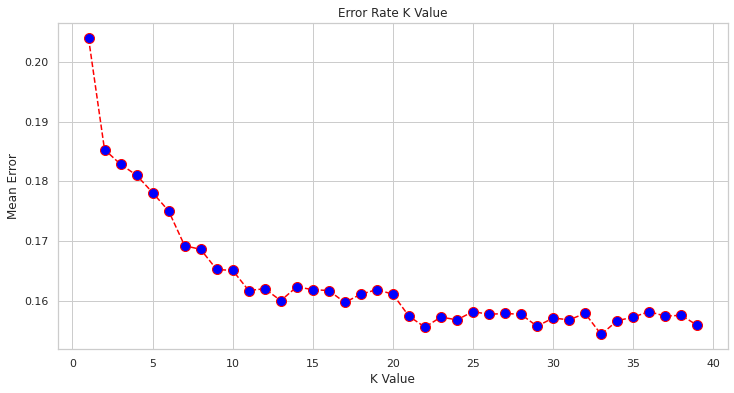

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Looking at the graph, the K vales  21 and 29 is giving a low Mean error.

In [ ]:
#Training the model using new k value
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=21)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
y_pred1=classifier1.predict(X_test)
                            

### Difference betweeen .score() and accuracy_score()is 
.score() takes (xtest,ytest)
accuracy_score takes (ytest,ypred) for the testing accuracy.

Task 4

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      4908
         1.0       0.72      0.59      0.65      1605

    accuracy                           0.84      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Test Accuracy is',accuracy_score(y_test, y_pred1))
print('Precision is',precision_score(y_test, y_pred1,average='weighted'))
print('recall is',recall_score(y_test, y_pred1,average='weighted'))


Test Accuracy is 0.8426224474128666
Precision is 0.8356750155406852
recall is 0.8426224474128666


#the below code is to find 'K' value based on MSE/RMSE for regression problems

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()